# 1.数据质量分析
## 1.1缺失值分析
## 1.2异常值分析
## 1.3一致性分析

In [5]:
#缺失值探索
import pandas as pd
file = r'D:\Books\数据分析与挖掘电子书\Python\Python数据分析与挖掘实战\chapter3\chapter3\data\catering_sale.xls'
data = pd.read_excel(file,index_col = '日期') #读入数据
data

,销量
日期,
2015-03-01,51.0
2015-02-28,2618.2
2015-02-27,2608.4
2015-02-26,2651.9
2015-02-25,3442.1
2015-02-24,3393.1
2015-02-23,3136.6
2015-02-22,3744.1
2015-02-21,6607.4


In [6]:
data.describe() #查看数据基本情况

D:\anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,销量
count,200.000000
mean,2755.214700
std,751.029772
min,22.000000
25%,NaN
50%,NaN
75%,NaN
max,9106.440000


In [7]:
len(data) #数据记录条数

201

##### count计算非空值数为200，数据记录条数len(data)为201，所以存在缺失值

D:\anaconda\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


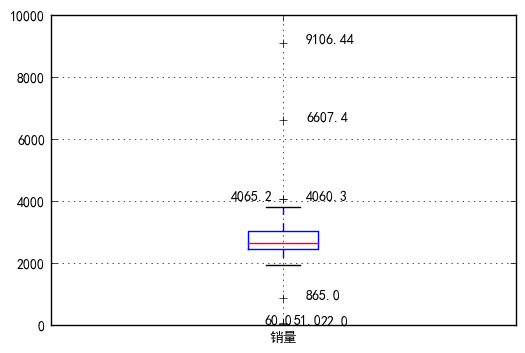

In [9]:
#异常值探索
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] #正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #正常显示负号
plt.figure() #建立图像
p = data.boxplot() #画箱线图
x = p['fliers'][0].get_xdata()
y = p['fliers'][0].get_ydata()
y.sort() #从小到大排序
#用annotate添加注释
for i in range(len(x)):
    if i>0:
        plt.annotate(y[i],xy =(x[i],y[i]),xytext=(x[i]+0.05 -0.8/(y[i]-y[i-1]),y[i]))
    else:
        plt.annotate(y[i],xy = (x[i],y[i]),xytext=(x[i]+0.08,y[i]))
plt.show()

##### 通过观察箱线图，可以将22，51，60，6607.4，9106.44归为异常值

# 2.数据特征分析
## 2.1分布分析
## 2.2对比分析
## 2.3统计量分析
## 2.4周期性分析
## 2.5贡献度分析
## 2.6相关性分析

In [11]:
#数据统计量分析
from __future__ import print_function
data = data[(data['销量']>400) & (data['销量']<5000)] #过滤异常数据
statistics = data.describe() #保存基本统计量

statistics.loc['range'] = statistics.loc['max']-statistics.loc['min'] #极差
statistics.loc['var'] = statistics.loc['std']/statistics.loc['mean'] #变异系数
statistics.loc['dis'] = statistics.loc['75%']-statistics.loc['25%'] #四分位数

print(statistics)

                销量
count   195.000000
mean   2744.595385
std     424.739407
min     865.000000
25%    2460.600000
50%    2655.900000
75%    3023.200000
max    4065.200000
range  3200.200000
var       0.154755
dis     562.600000


D:\anaconda\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


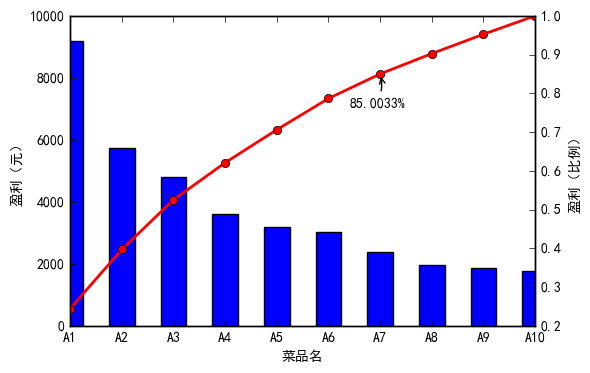

In [12]:
#帕累托图
from __future__ import print_function
import pandas as pd
#初始化参数
file = r'D:\Books\数据分析与挖掘电子书\Python\Python数据分析与挖掘实战\chapter3\chapter3\data\catering_dish_profit.xls'
data = pd.read_excel(file,index_col = '菜品名') #读入数据
data = data['盈利'].copy()
data.sort(ascending = False)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure()
data.plot(kind='bar')
plt.ylabel('盈利（元）')
p = 1.0*data.cumsum()/data.sum()
p.plot(color = 'r',secondary_y = True,style = '-o',linewidth = 2)
plt.annotate(format(p[6],'.4%'),xy = (6,p[6]),xytext = (6*0.9,p[6]*0.9),arrowprops = dict(arrowstyle = '->',connectionstyle='arc3,rad=.2'))
plt.ylabel('盈利（比例）')
plt.show()

In [13]:
#相关性分析
from __future__ import print_function
import pandas as pd

file = r'D:\Books\数据分析与挖掘电子书\Python\Python数据分析与挖掘实战\chapter3\chapter3\data\catering_sale_all.xls'
data = pd.read_excel(file,index_col = '日期') #读入数据，日期为索引

data.corr() #相关系数矩阵


,百合酱蒸凤爪,翡翠蒸香茜饺,金银蒜汁蒸排骨,乐膳真味鸡,蜜汁焗餐包,生炒菜心,铁板酸菜豆腐,香煎韭菜饺,香煎罗卜糕,原汁原味菜心
百合酱蒸凤爪,1.000000,0.009206,0.016799,0.455638,0.098085,0.308496,0.204898,0.127448,-0.090276,0.428316
翡翠蒸香茜饺,0.009206,1.000000,0.304434,-0.012279,0.058745,-0.180446,-0.026908,0.062344,0.270276,0.020462
金银蒜汁蒸排骨,0.016799,0.304434,1.000000,0.035135,0.096218,-0.184290,0.187272,0.121543,0.077808,0.029074
乐膳真味鸡,0.455638,-0.012279,0.035135,1.000000,0.016006,0.325462,0.297692,-0.068866,-0.030222,0.421878
蜜汁焗餐包,0.098085,0.058745,0.096218,0.016006,1.000000,0.308454,0.502025,0.155428,0.171005,0.527844
生炒菜心,0.308496,-0.180446,-0.184290,0.325462,0.308454,1.000000,0.369787,0.038233,0.049898,0.122988
铁板酸菜豆腐,0.204898,-0.026908,0.187272,0.297692,0.502025,0.369787,1.000000,0.095543,0.157958,0.567332
香煎韭菜饺,0.127448,0.062344,0.121543,-0.068866,0.155428,0.038233,0.095543,1.000000,0.178336,0.049689
香煎罗卜糕,-0.090276,0.270276,0.077808,-0.030222,0.171005,0.049898,0.157958,0.178336,1.000000,0.088980
原汁原味菜心,0.428316,0.020462,0.029074,0.421878,0.527844,0.122988,0.567332,0.049689,0.088980,1.000000


In [14]:
data.corr()['百合酱蒸凤爪'] #‘百合酱蒸凤爪’跟其它菜式的相关系数

百合酱蒸凤爪     1.000000
翡翠蒸香茜饺     0.009206
金银蒜汁蒸排骨    0.016799
乐膳真味鸡      0.455638
蜜汁焗餐包      0.098085
生炒菜心       0.308496
铁板酸菜豆腐     0.204898
香煎韭菜饺      0.127448
香煎罗卜糕     -0.090276
原汁原味菜心     0.428316
Name: 百合酱蒸凤爪, dtype: float64

In [15]:
data['百合酱蒸凤爪'].corr(data['香煎韭菜饺']) #'百合酱蒸凤爪'和'香煎韭菜饺'的相关系数

0.12744824913478661

# 3.Python主要数据探索函数
## 3.1基本统计特征函数
#### D表示DataFrame或Series;S表示Series
##### sum  计算样本的总和   D.sum()
##### mean            计算均值                        D.mean()
##### var                计算方差                        D.var()
##### std                计算标准差                     D.std()
##### corr              计算相关系数矩阵           D.corr()   s1.corr(s2) 计算s1,s2的相关系数
##### cov               计算协方差矩阵              D.cov()   s1.cov(s2) 计算s1,s2的协方差矩阵
##### skew/kurt      计算偏度/峰度               D.skew()/D.kurt()
##### describe         基本统计量                  D.describe()

## 3.2作图函数

>import matplotlib.pyplot as plt #导入库

>%matplotlib inline #在线显示图片，魔法函数

>plt.rcParams['font.sans-serif'] = ['SimHei'] #显示中文标签

>plt.rcParams['axes.unicode_minus'] = False #正常显示负号

>plt.figure(figsize = (7,5)) #创建图像区域，指定比例,可以省略

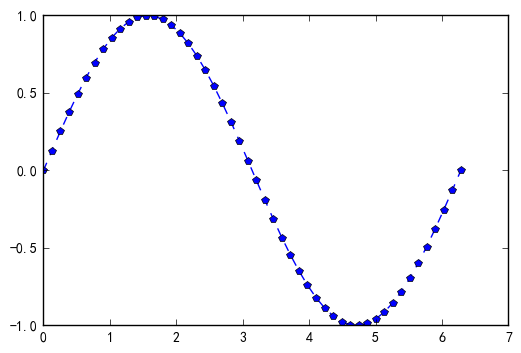

In [17]:
#线性二维图
#plt.plot(x,y,S)
#S指定图形类型
#'b'蓝色,'r'红色;'o'圆圈,'-'实线,'--'虚线

#D.plot(kind='box')
#line,bar,hist,box,kde,pie(线图，条形图，直方图，箱型图，饼图)
import numpy as np 
x = np.linspace(0,2*np.pi,50)
y = np.sin(x)
plt.plot(x,y,'bp--')
plt.show()

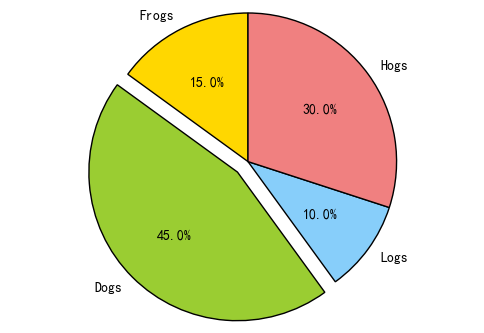

In [19]:
#绘制饼图
#plt.pie(size)
labels = 'Frogs','Dogs','Logs','Hogs'
sizes = [15,45,10,30]
colors = ['gold','yellowgreen','lightskyblue','lightcoral']
explode = (0,0.1,0,0) #突出显示
plt.pie(sizes,explode = explode,labels = labels,colors = colors,autopct = '%1.1f%%',shadow = False,startangle = 90)
plt.axis('equal') #显示为圆,避免压缩为椭圆
plt.show()

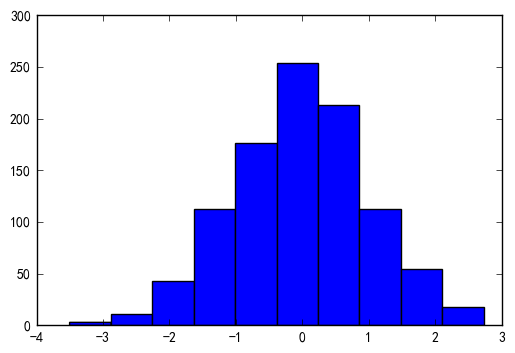

In [20]:
#直方图
#plt.hist(x,y)
#y可以是整数，表示均分为y份；也可以是列表，列表各个数字为边界点
x = np.random.randn(1000)
plt.hist(x,10)
plt.show()

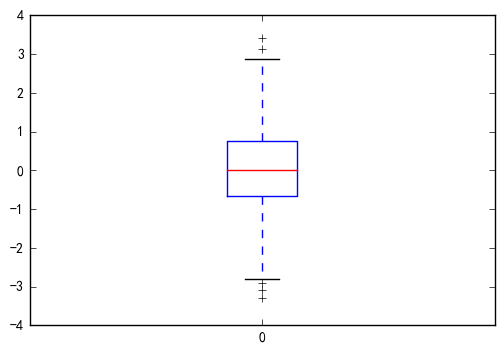

In [21]:
#箱型图
#D.boxplot()/D.plot(kind='box')
x = np.random.randn(1000)
D = pd.DataFrame(x,x+1) #构造两列的数据框
D.plot(kind = 'box')
plt.show()

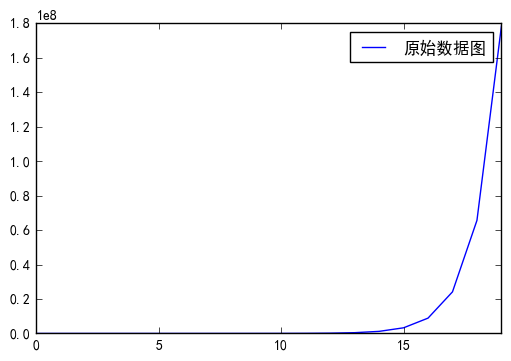

In [23]:
#plot(logx = True)
#绘制x的对数图
x = pd.Series(np.exp(np.arange(20))) #原始数据
x.plot(label = '原始数据图',legend = True)
plt.show()

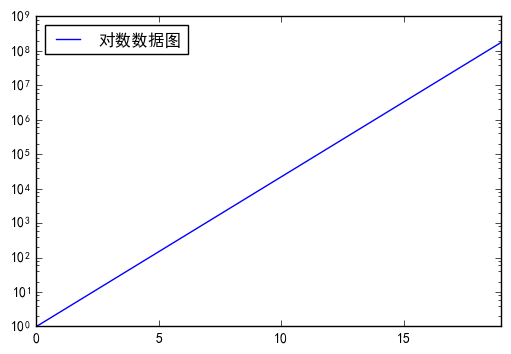

In [26]:
x.plot(logy = True,label = '对数数据图',legend = True)
plt.show()

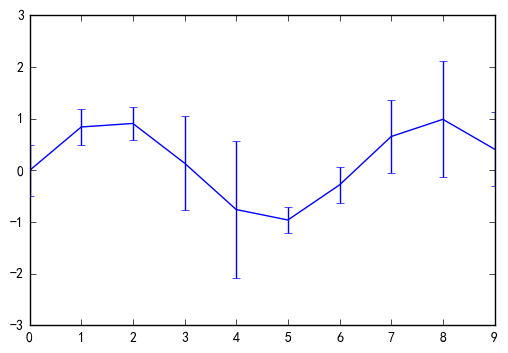

In [27]:
#绘制误差条形图
#D.plot(yerr = error)
error = np.random.randn(10) #定义误差列
y = pd.Series(np.sin(np.arange(10))) #均值数据列
y.plot(yerr = error)
plt.show()